In [49]:
import pandas as pd

from matplotlib import pyplot as plt

In [50]:
flights_ds = pd.read_csv('Datasets/flights.csv')
usa_airports = pd.read_csv('Datasets/airports.csv')
airlines_names = pd.read_csv('Datasets/airlines.csv')

In [ ]:
flights_ds.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def sorting_func(df, target_column : str, target_rename : str, index_name : str = 'index'):
    return(pd.DataFrame(df[target_column].value_counts()).reset_index().sort_values(by = 'index', ascending=True).rename(columns = {'index' : index_name, target_column : target_rename}).set_index(index_name))

1.1

In [ ]:
sorted_monthes

,races
month,
Январь,469968
Февраль,429191
Март,504312
Апрель,485151
Май,496993
Июнь,503897
Июль,520718
Август,510536
Сентябрь,464946


<AxesSubplot: xlabel='month'>

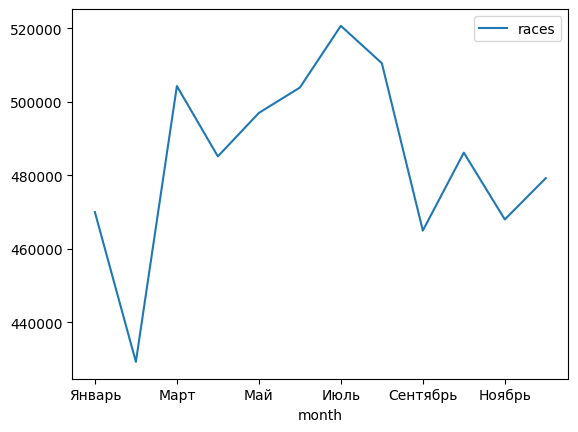

In [ ]:
sorted_monthes = sorting_func(flights_ds, 'MONTH', 'races', 'month').reset_index().replace(range(1, 13), ('Январь', "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь")).set_index('month')
sorted_monthes.plot()

Пик перевозок приходится на 7 месяц - июль. Минимум перевозок пришелся на 2 месяц - февраль

1.2

<AxesSubplot: xlabel='day_of_week'>

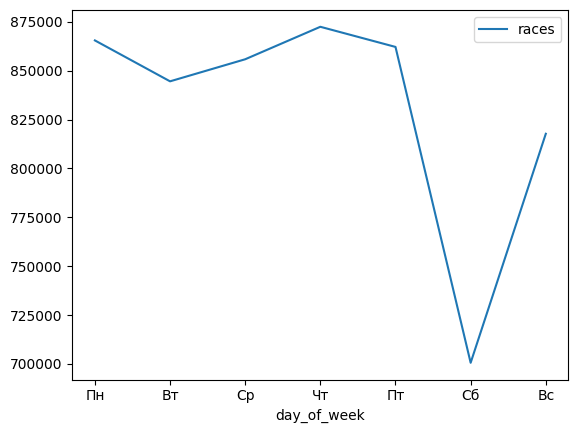

In [ ]:
sorted_days = sorting_func(flights_ds, 'DAY_OF_WEEK', 'races', 'day_of_week').reset_index().replace(range(1, 8), ("Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс")).set_index('day_of_week')
sorted_days.plot()

В целом, количество рейсов до субботы держится на примерно одном уровне с просадкой во вторник и подъемом в четверг, но в субботу трафик резко падает, после чего в воскресенье трафик стремится вернуться в нормальное состояние

1.3

Устанавливаем в качестве индексов аэропорты отправления, объединяем получившийся датафрейм с датафреймом с названиями аэропортов, устанавливая в нем индексами коды аэропортов. Применяем сортировку по значениям

In [ ]:
df_test_origin = flights_ds.set_index('ORIGIN_AIRPORT').join(usa_airports.set_index('IATA_CODE'), sort = 1)

In [ ]:
df_test_origin

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
10135,2015,10,1,4,EV,5033,N867AS,10397,1200,1154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,1,4,EV,6011,N12996,13930,1205,1157.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,1,4,EV,5175,N851AS,11433,1255,1248.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,1,4,EV,5317,N858AS,10397,1600,1555.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,1,4,EV,5145,N849AS,11433,1711,1711.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,2015,12,31,4,OO,2992,N435SW,PHX,946,933.0,...,NaN,NaN,NaN,NaN,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597
YUM,2015,12,31,4,OO,2991,N464SW,PHX,1130,1121.0,...,NaN,NaN,NaN,NaN,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597
YUM,2015,12,31,4,OO,2961,N869AS,PHX,1255,1245.0,...,NaN,NaN,NaN,NaN,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597
YUM,2015,12,31,4,OO,2956,N821AS,PHX,1605,1602.0,...,NaN,NaN,NaN,NaN,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


Выводим количество рейсов в каждом из городов отправления

In [ ]:
df_test_origin.CITY.value_counts()

Chicago              366770
Atlanta              346836
Dallas-Fort Worth    239551
Houston              198664
Denver               196055
                      ...  
St Cloud                 83
Dillingham               77
Gustavus                 77
King Salmon              63
Ithaca                   34
Name: CITY, Length: 308, dtype: int64

Устанавливаем в качестве индексов аэропорты отправления, объединяем получившийся датафрейм с датафреймом с названиями аэропортов, устанавливая в нем индексами коды аэропортов. Применяем сортировку по значениям

In [ ]:
df_test_dist = flights_ds.set_index('DESTINATION_AIRPORT').join(usa_airports.set_index('IATA_CODE'), sort = 1)

Выводим количество рейсов в каждом из городов прибытия

In [ ]:
df_test_dist.CITY.value_counts()

Chicago              366790
Atlanta              346904
Dallas-Fort Worth    239582
Houston              198724
Denver               196010
                      ...  
St Cloud                 82
Gustavus                 77
Dillingham               77
King Salmon              63
Ithaca                   35
Name: CITY, Length: 308, dtype: int64

Переименовываем столбцы

In [ ]:
df_test_origin = pd.DataFrame(df_test_origin[['AIRLINE', "CITY"]].CITY.value_counts()).rename(columns = {'CITY' : 'races'})

In [ ]:
df_test_dist = pd.DataFrame(df_test_dist[['AIRLINE', "CITY"]].CITY.value_counts()).rename(columns = {'CITY' : 'races'})

Складываем количество перевозок в каждом городе при отправлении и прибытии, выбираем топ-10 городов по количеству перевозок

In [ ]:
pd.DataFrame(df_test_origin + df_test_dist).sort_values(by = 'races', ascending=False).iloc()[ : 10]

,races
Chicago,733560
Atlanta,693740
Dallas-Fort Worth,479133
Houston,397388
Denver,392065
Los Angeles,389369
New York,386806
San Francisco,295974
Phoenix,293627
Las Vegas,266379


1.4

Считаем количество упоминаний каждой авиакомпании в рейсах, переименовываем столбец "AIRLINE" в "races", объединяем с названиями авиалиний по ключу-сокращению названий авиалиний, устанавливаем индекс - "AIRLINE"

In [ ]:
pd.DataFrame(flights_ds.AIRLINE.value_counts()).rename(columns = {'AIRLINE' : 'races'}).join(airlines_names.set_index('IATA_CODE')).set_index('AIRLINE')

,races
AIRLINE,
Southwest Airlines Co.,1261855
Delta Air Lines Inc.,875881
American Airlines Inc.,725984
Skywest Airlines Inc.,588353
Atlantic Southeast Airlines,571977
United Air Lines Inc.,515723
American Eagle Airlines Inc.,294632
JetBlue Airways,267048
US Airways Inc.,198715


2.1

Отрицательные значения задержки = опережение графика. Минимальная задержка - нулевая

In [ ]:
t = flights_ds[flights_ds['DEPARTURE_DELAY'] == 0]

Проверяем

In [ ]:
pd.DataFrame(t.DEPARTURE_DELAY.value_counts()).index.min()

0.0

Всего перелетов с задержкой от нуля и выше

In [ ]:
len(t)

2454978

Выбираю аэропорты с нулевой задержкой вылета, считаю количество рейсов без задержек для всех аэропортов, после чего берем первую строку - аэропорт с максимальным количеством своевременных отправлений

In [ ]:
pd.DataFrame((t[t['DEPARTURE_DELAY'] == 0]['ORIGIN_AIRPORT']).value_counts()).reset_index().rename(columns={'index' : 'Airport', 'ORIGIN_AIRPORT' : '0_delay_races'}).iloc()[0]

Airport            ATL
0_delay_races    30085
Name: 0, dtype: object

2.2

In [ ]:
usa_airports.iloc()[237].IATA_CODE

'PHF'

In [ ]:
airlines_arrive_delay = flights_ds[flights_ds['DESTINATION_AIRPORT'] == 'PHF'][['AIRLINE', 'ARRIVAL_DELAY']].sort_values(by = ['ARRIVAL_DELAY'], ascending=True)

Самая пунктуальная авиакомпания

In [ ]:
airline = pd.DataFrame(airlines_arrive_delay[airlines_arrive_delay['ARRIVAL_DELAY'] >= 0]).iloc()[0][0]
airlines_names[airlines_names['IATA_CODE'] == airline].AIRLINE.iloc()[0]

'Atlantic Southeast Airlines'

2.3

In [ ]:
origin_delay = flights_ds.TAXI_OUT.groupby(flights_ds.ORIGIN_AIRPORT).mean().sort_values(ascending=False)
destination_delay = flights_ds.TAXI_IN.groupby(flights_ds.DESTINATION_AIRPORT).mean().sort_values(ascending=False)
all_delays = origin_delay.append(destination_delay)
top_delays = all_delays.groupby(all_delays.index).mean().nlargest(10)

C:\Users\orlov\AppData\Local\Temp\ipykernel_23600\2992442207.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_delays = origin_delay.append(destination_delay)


In [ ]:
top_delays = top_delays.reset_index()
top_delays['index'] = top_delays['index'].astype('string')
top_delays.set_index('index', inplace=True)
top_delays.rename(columns = {0 : 'delays'}, inplace = True)

In [ ]:
usa_airports[usa_airports['IATA_CODE'].isin(top_delays.index)]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
166,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893
182,LGA,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
228,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446


<BarContainer object of 10 artists>

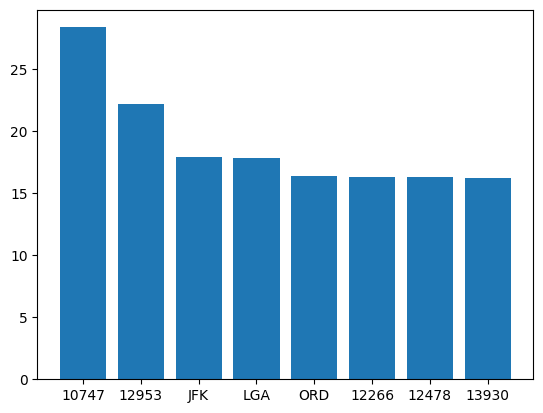

In [ ]:
plt.bar(top_delays.index, top_delays.delays)